In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import tensorflow as tf
import ipywidgets as wd
import io
import tqdm
from PIL import Image

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=90)
X_train.shape

(3264, 150, 150, 3)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=90)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
66/66 [==============================] - 4s 62ms/step - loss: 0.0546 - accuracy: 0.9799 - val_loss: 0.2189 - val_accuracy: 0.9484
Epoch 2/25
66/66 [==============================] - 4s 55ms/step - loss: 0.1187 - accuracy: 0.9650 - val_loss: 0.2736 - val_accuracy: 0.9082
Epoch 3/25
66/66 [==============================] - 4s 55ms/step - loss: 0.0969 - accuracy: 0.9737 - val_loss: 0.4229 - val_accuracy: 0.8700
Epoch 4/25
66/66 [==============================] - 4s 53ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.2422 - val_accuracy: 0.9369
Epoch 5/25
66/66 [==============================] - 3s 52ms/step - loss: 0.1147 - accuracy: 0.9655 - val_loss: 0.2026 - val_accuracy: 0.9426
Epoch 6/25
66/66 [==============================] - 4s 54ms/step - loss: 0.0365 - accuracy: 0.9856 - val_loss: 0.1949 - val_accuracy: 0.9407
Epoch 7/25
66/66 [==============================] - 4s 55ms/step - loss: 0.0801 - accuracy: 0.9713 - val_loss: 0.2025 - val_accuracy: 0.9254
Epoch 8/25
66

In [34]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (109).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [35]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

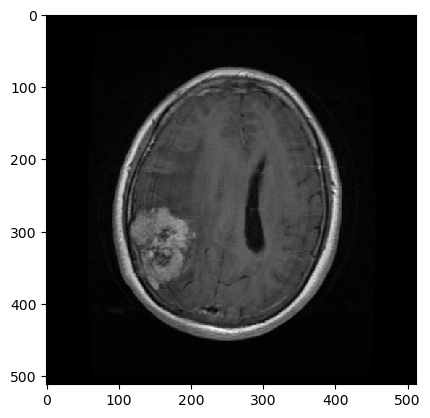

In [36]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (109).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [37]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 20ms/step


1